In [1]:
import numpy as np
import pandas as pd

health = pd.read_csv("../Datasets/rankmd.csv", delimiter=";")
FastFood = pd.read_csv("../Datasets/FastFoodRestaurants.csv")
income = pd.read_csv("../Datasets/kaggle_income.csv", encoding="ISO 8859-1")

In [2]:
health

,FIPS,State,County,Unreliable,premature_deathDeaths,premature_deathYears_of_Potential_Life_Lost_Rate,premature_death_95% CILow,premature_death_95% CI - High,premature_death_Quartile,premature_death_YPLL Rate (AIAN),...,drive_alone_to_work_% Drive Alone (Hispanic) 95% CI - High,drive_alone_to_work_% Drive Alone (White),drive_alone_to_work_% Drive Alone (White) 95% CI - Low,drive_alone_to_work_% Drive Alone (White) 95% CI - High,long_commute_driving_alone_# Workers who Drive Alone,long_commute_driving_alone_% Long Commute - Drives Alone,long_commute_driving_alone_95% CI - Low,long_commute_driving_alone_95% CI - High,long_commute_driving_alone_Quartile,Unnamed: 249
0,1000,Alabama,NaN,NaN,82249.0,9820.0,9718.0,9922.0,NaN,5145.0,...,78.0,87.0,87.0,87.0,2073072,35,34,35,NaN,NaN
1,1001,Alabama,Autauga,NaN,787.0,7830.0,6998.0,8662.0,1.0,NaN,...,NaN,82.0,78.0,87.0,24635,38,34,42,2.0,NaN
2,1003,Alabama,Baldwin,NaN,3147.0,7680.0,7237.0,8124.0,1.0,NaN,...,83.0,82.0,80.0,84.0,93141,40,38,43,3.0,NaN
3,1005,Alabama,Barbour,NaN,515.0,11477.0,9908.0,13045.0,3.0,NaN,...,NaN,86.0,82.0,91.0,8231,31,26,36,2.0,NaN
4,1007,Alabama,Bibb,NaN,476.0,12173.0,10506.0,13839.0,4.0,NaN,...,NaN,NaN,NaN,NaN,8167,52,44,60,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,56037,Wyoming,Sweetwater,NaN,527.0,7775.0,6849.0,8701.0,3.0,NaN,...,67.0,77.0,75.0,79.0,21188,17,14,19,2.0,NaN
3189,56039,Wyoming,Teton,NaN,109.0,2980.0,2094.0,3866.0,1.0,NaN,...,76.0,67.0,63.0,71.0,14096,16,11,21,2.0,NaN
3190,56041,Wyoming,Uinta,NaN,271.0,8081.0,6637.0,9525.0,4.0,NaN,...,NaN,NaN,NaN,NaN,9155,20,15,24,3.0,NaN
3191,56043,Wyoming,Washakie,NaN,104.0,6541.0,4417.0,8665.0,2.0,NaN,...,NaN,NaN,NaN,NaN,3663,7,4,10,1.0,NaN


In [61]:
#health['ColumnID'] = total_rows['ColumnID']
States = health[health['FIPS'].astype(str).str.endswith('000')]
print("Top 5 states with the most Premature Deaths:")
States.sort_values("premature_deathDeaths",ascending=False).head()


Top 5 states with the most Premature Deaths:


,FIPS,State,County,Unreliable,premature_deathDeaths,premature_deathYears_of_Potential_Life_Lost_Rate,premature_death_95% CILow,premature_death_95% CI - High,premature_death_Quartile,premature_death_YPLL Rate (AIAN),...,drive_alone_to_work_% Drive Alone (Hispanic) 95% CI - High,drive_alone_to_work_% Drive Alone (White),drive_alone_to_work_% Drive Alone (White) 95% CI - Low,drive_alone_to_work_% Drive Alone (White) 95% CI - High,long_commute_driving_alone_# Workers who Drive Alone,long_commute_driving_alone_% Long Commute - Drives Alone,long_commute_driving_alone_95% CI - Low,long_commute_driving_alone_95% CI - High,long_commute_driving_alone_Quartile,Unnamed: 249
190,6000,California,NaN,NaN,350612.0,5253.0,5228.0,5278.0,NaN,9636.0,...,74.0,75.0,75.0,75.0,18191555,42,42,42,NaN,NaN
2566,48000,Texas,NaN,NaN,302432.0,6620.0,6587.0,6653.0,NaN,3497.0,...,79.0,82.0,82.0,82.0,13115511,39,39,39,NaN,NaN
329,12000,Florida,NaN,NaN,266657.0,7188.0,7145.0,7231.0,NaN,5380.0,...,77.0,81.0,81.0,81.0,9383111,42,42,43,NaN,NaN
1860,36000,New York,NaN,NaN,191195.0,5406.0,5370.0,5443.0,NaN,4789.0,...,35.0,63.0,63.0,63.0,9300315,39,38,39,NaN,NaN
2078,39000,Ohio,NaN,NaN,169097.0,8545.0,8484.0,8607.0,NaN,4405.0,...,76.0,85.0,85.0,85.0,5488776,31,31,31,NaN,NaN


[Text(0.5, 1.0, 'Percentage of Obese people per state')]

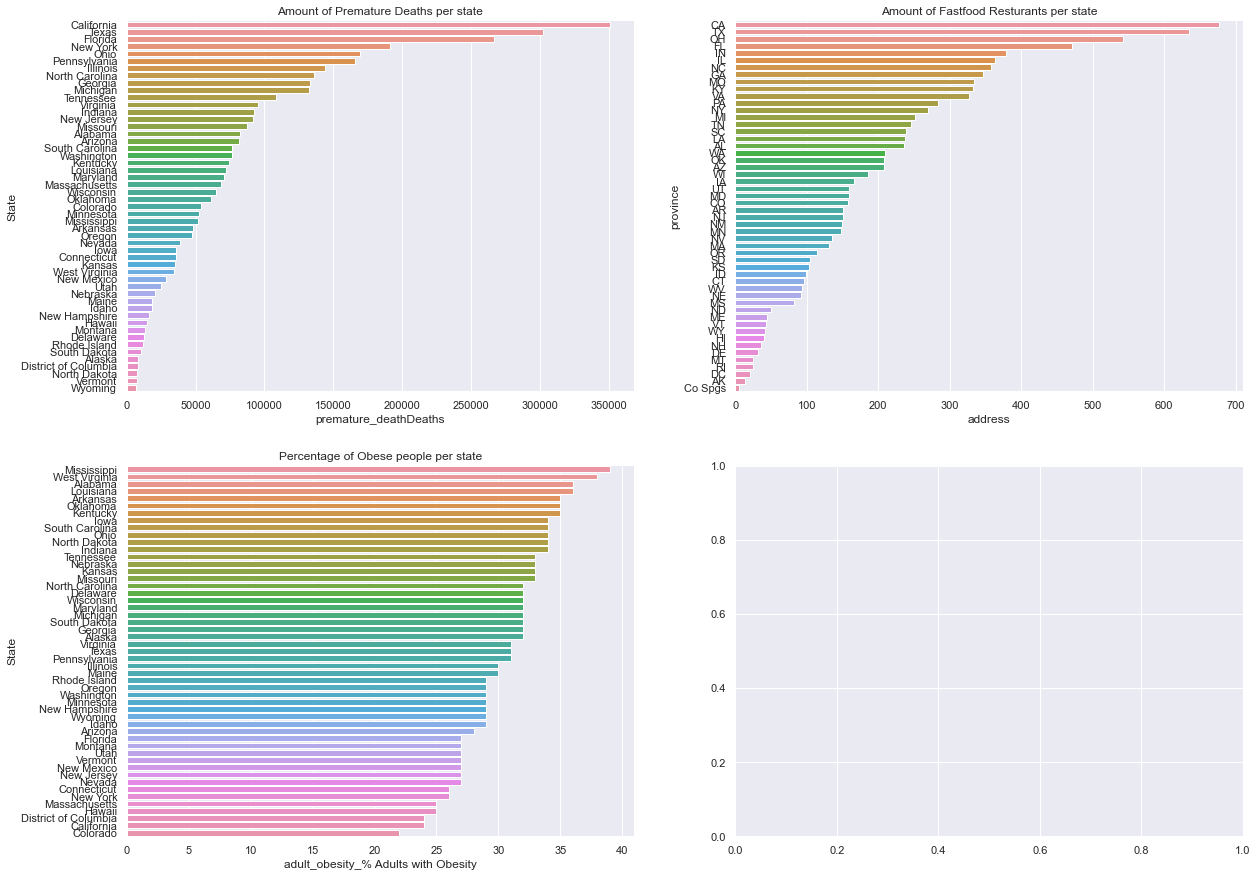

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, sharex=False, figsize=(20,15))

sns.set(rc={'figure.figsize':(12,9)})
sns.despine(left=True, bottom=True)
sns.barplot(ax=axes[0,0], data=States.sort_values("premature_deathDeaths",ascending=False), y='State', x='premature_deathDeaths').set(title='Amount of Premature Deaths per state')
sns.barplot(ax=axes[0,1], data=FastFood.groupby(['province']).count().reset_index().sort_values("address",ascending=False), y='province', x='address').set(title='Amount of Fastfood Resturants per state')
sns.barplot(ax=axes[1,0], data=States.sort_values('adult_obesity_% Adults with Obesity',ascending=False), y='State', x='adult_obesity_% Adults with Obesity').set(title='Percentage of Obese people per state')

[Text(0.5, 1.0, 'Amount of Fastfood Resturants per state')]

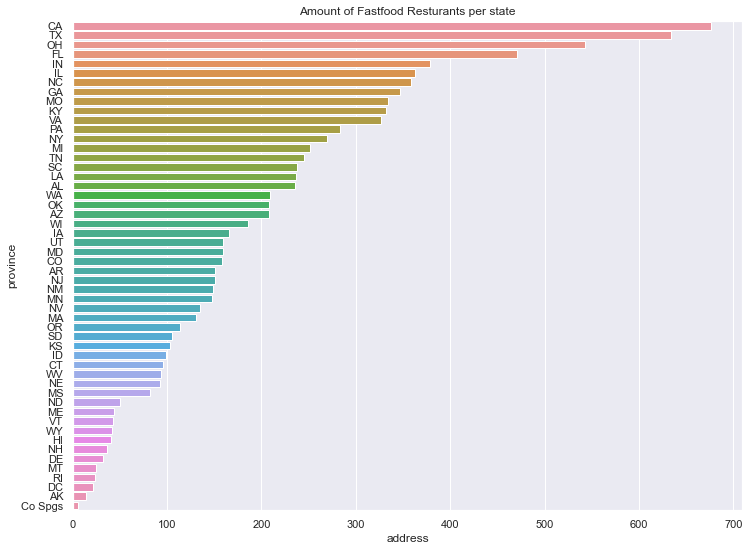

In [67]:
sns.set(rc={'figure.figsize':(12,9)})
sns.despine(left=True, bottom=True)
sns.barplot(data=FastFood.groupby(['province']).count().reset_index().sort_values("address",ascending=False), y='province', x='address').set(title='Amount of Fastfood Resturants per state')

In [70]:
health['adult_obesity_% Adults with Obesity']

0       36
1       33
2       30
3       41
4       37
        ..
3188    30
3189    11
3190    35
3191    29
3192    37
Name: adult_obesity_% Adults with Obesity, Length: 3193, dtype: int64

[Text(0.5, 1.0, 'Percentage of Obese people per state')]

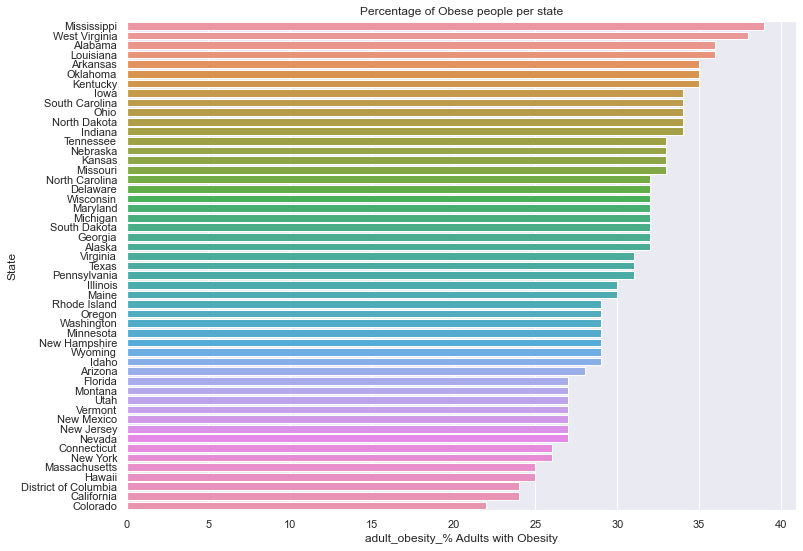

In [72]:
sns.barplot(data=States.sort_values('adult_obesity_% Adults with Obesity',ascending=False), y='State', x='adult_obesity_% Adults with Obesity').set(title='Percentage of Obese people per state')